<a href="https://colab.research.google.com/github/lizzymuch/github_Share/blob/main/NN_for_more_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
import csv


In [ ]:
rangeto = 16 # 8
minl = 10
# maxl = max in totals
type_amount28 = 0
type_amount1to8 = 400
test_amount = 100
pad_type = 'all0' # 'all0' or '0000-1+640'
repeat_time = 25
filename = 'response'
fixlayer12 = True # False
filter_width = 20

if rangeto == 16:
    ons = [[57, 113, 226, 453],
        [40, 80, 160, 320],
        [33, 65, 131, 261],
        [28, 57, 113, 226],
        [25, 51, 101, 202],
        [23, 46, 92, 185],
        [21, 43, 86, 171],
        [20, 40, 80, 160],
        [19, 38, 75, 151],
        [18, 36, 72, 143],
        [17, 34, 68, 136],
        [16, 33, 65, 131],
        [16, 31, 63, 126],
        [15, 30, 60, 121],
        [15, 29, 58, 117],
        [14, 28, 57, 113]]
    totals = [[566, 1131, 2263, 4525],
          [800, 1600, 3200, 6400],
          [980, 1960, 3919, 7838],
          [1131, 2263, 4525, 9051],
          [1265, 2530, 5060, 10119],
          [1386, 2271, 5543, 11085],
          [1497, 2993, 5987, 11973],
          [1600, 3200, 6400, 12800],
          [1697, 3394, 6788, 13576],
          [1789, 3578, 7155, 14311],
          [1876, 3752, 7505, 15009],
          [1960, 3919, 7838, 15677],
          [2040, 4079, 8158, 16317],
          [2117, 4233, 8466, 16933],
          [2191, 4382, 8764, 17527],
          [2263, 4525, 9051, 18102]]
    maxl = max(max(totals))
else:
    ons = [[57, 113, 226, 453],
        [40, 80, 160, 320],
        [33,65,131,261],
        [28, 57, 113, 226],
        [25,51, 101, 202],
        [23, 46, 92, 185],
        [21, 43, 86, 171],
        [20, 40, 80, 160]]
    totals = [[566, 1131, 2263, 4525],
        [800, 1600, 3200, 6400],
        [980, 1960, 3919, 7838],
        [1131, 2263, 4525, 9051],
        [1265, 2530, 5060, 10119],
        [1386, 2271, 5543, 11085],
        [1497, 2993, 5987, 11973],
        [1600, 3200, 6400, 12800]]
    maxl = max(max(totals))

on2 = [40, 80, 160, 320]
total2 = [800, 1600, 3200, 6400]
on8 = [20, 40, 80, 160]
total8 = [1600, 3200, 6400, 12800]

if pad_type == '0000-1+640':
    maxl=13000

def generate(n_event, total, on, same_length=True, minl = 20, maxl = 12800):
    total = int(round(total/minl))
    on = int(round(on/minl))
    start = [on*i + x for i, x in enumerate(sorted(random.sample(range(total - (n_event-1)*on - on), n_event)))]
    sound = [0]*total
    for i in start:
        sound[i:i+on] = [1]*on
    if same_length:
        if pad_type == 'all0':
            full = int(round(maxl/minl))
            if full>total:
                sound = [0]*(full-total) + sound
        elif pad_type == '0000-1+640':
            full = int(round(maxl/minl))
            if full>total:
                sound = [0]*(full-total-1) +[-1] + sound
    return sound

# training + validation data for 2/8
def gen_train(on2, total2, on8, total8, type_amount):
    X2 = []
    for o in on2:
        for t in total2:
            for i in range(type_amount):
                X2.append(generate(2, t, o, minl=minl, maxl=maxl))
    X8 = []
    for o in on8:
        for t in total8:
            for i in range(type_amount):
                X8.append(generate(8, t, o, minl=minl, maxl=maxl))
    y = np.concatenate((0*np.ones(len(X2)), 1*np.ones(len(X8))))
    X = np.concatenate((X2, X8))
    X, y = shuffle(X, y, random_state=2)            
    return X, y

# training + validation data for 1-16
def gen_trains(ons, totals, type_amount):
    y = []
    X = []
    for n in range(len(ons)):
        for o in ons[n]:            
            for t in totals[n]:
                Xn = []
                for i in range(type_amount):
                    Xn.append(generate(n+1, t, o, minl=minl, maxl=maxl))
                y += [n]*type_amount
                X += Xn
    X, y = shuffle(X, y, random_state=2)            
    return np.array(X), np.array(y)

def get_test(rangeto, type_amount, totalon = 320, total=3200):
    y = []
    X = []
    for n in range(1, rangeto+1):
        on = int(round(totalon/n))
        Xn = []
        for i in range(type_amount):
            Xn.append(generate(n, total, on, minl=minl, maxl=maxl))
        y += [n-1]*type_amount
        X += Xn
    X, y = shuffle(X, y, random_state=2)            
    return np.array(X), np.array(y)

# testing data
Xt, yt = gen_train(on2, total2, on8, total8, test_amount)
Xt2, yt2 = get_test(rangeto, test_amount)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

------- 1 --------
training more numbers...
50/50 [==============================] - 0s 8ms/step - loss: 2.7901 - accuracy: 0.0775
[2.790076971054077, 0.07750000059604645]


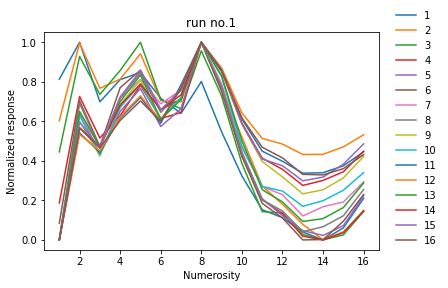

------- 2 --------
training more numbers...
50/50 [==============================] - 0s 8ms/step - loss: 2.4610 - accuracy: 0.1475
[2.460998773574829, 0.14749999344348907]


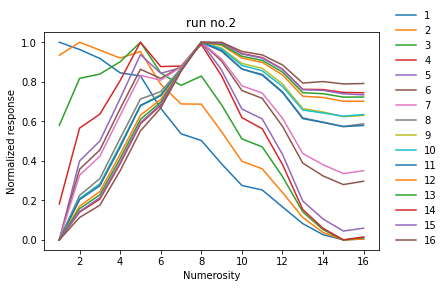

------- 3 --------
training more numbers...
50/50 [==============================] - 0s 8ms/step - loss: 2.5286 - accuracy: 0.1437
[2.5285730361938477, 0.14374999701976776]


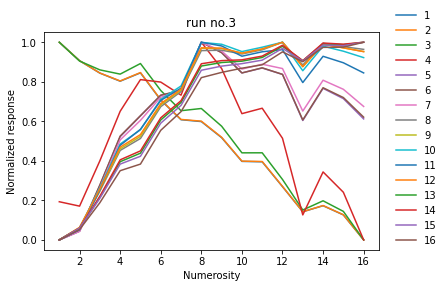

------- 4 --------
training more numbers...
50/50 [==============================] - 0s 8ms/step - loss: 2.5081 - accuracy: 0.1481
[2.5081329345703125, 0.14812499284744263]


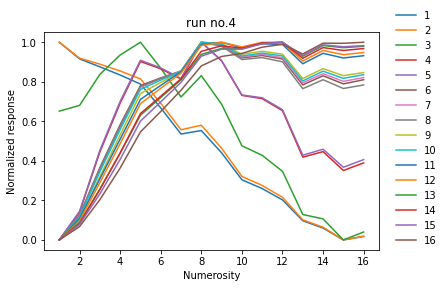

------- 5 --------


In [ ]:
# cnn
all_response = []

Xte = np.expand_dims(Xt, axis=2)
Xr2 = np.expand_dims(Xt2, axis=2) 

for i in range(repeat_time):
    print("-------",i+1,'--------')  
    if type_amount28: 
        # training + validation data
        X, y = gen_train(on2, total2, on8, total8, type_amount28)
        Xr = np.expand_dims(X, axis=2)
        # Convolutionary Neural Network
        keras.backend.clear_session()
        model = keras.Sequential(
            [
                layers.Conv1D(1, filter_width, activation='relu'),
                layers.Flatten(),
                layers.Dense(64, activation="sigmoid", name="layer1"),
                 layers.Dense(64, activation="sigmoid", name="layer2"),
                layers.Dense(2, activation="sigmoid", name="layer3"),
                
            ]
        )
        model.build(input_shape=(None, maxl//minl ,1))
        model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
    #'binary_crossentropy'
        model.fit(Xr,y,epochs=100, verbose=0, shuffle=False, validation_split=0.2, callbacks=[es])
        print('training 2/8...') 
        print(model.evaluate(Xte, yt))


    X, y = gen_trains(ons, totals, type_amount1to8)
    Xr = np.expand_dims(X, axis=2)

    model2 = keras.Sequential(
        [
            layers.Conv1D(1, filter_width, activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation="sigmoid", name="layer1"),
             layers.Dense(64, activation="sigmoid", name="layer2"),
            layers.Dense(rangeto, activation="sigmoid", name="layer3"),
            
        ]
    )
    model2.build(input_shape=(None, maxl//minl ,1))
    if type_amount28:
        model2.layers[0].set_weights(model.layers[0].get_weights())
        model2.layers[2].set_weights(model.layers[2].get_weights())
        # model2.layers[3].set_weights(model.layers[3].get_weights())
    if fixlayer12:
        model2.layers[0].trainable = False
        model2.layers[2].trainable = False
        # model2.layers[3].trainable = False

    model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
    model2.fit(Xr,y,epochs=100, verbose=0, shuffle=False, validation_split=0.2, callbacks=[es])

    print('training more numbers...')
    # print(model2.evaluate(Xr, y))
    print(model2.evaluate(Xr2, yt2))

    with open(filename+str(i+1)+'.csv', 'w') as f: # raw
        write = csv.writer(f)
        write.writerow(list(range(1,rangeto+1))+['input']) 
    with open(filename+'-norm'+str(i+1)+'.csv', 'w') as f: # normalized
        write = csv.writer(f)
        write.writerow(list(range(1,rangeto+1))+['input'])

    predi = model2.predict(Xr2)
    for n in range(0,rangeto):  
        this_response = predi[np.squeeze(np.where(yt2==n)),:]
        with open(filename+str(i+1)+'.csv', 'a') as f: # raw
            write = csv.writer(f)
            write.writerows(np.concatenate((this_response, (n+1)*np.ones((len(this_response),1))), axis=1))
        # normalize each
        for r in range(len(this_response)):
            this_min = min(this_response[r,:])
            this_max = max(this_response[r,:])
            this_response[r,:] = (this_response[r,:] - this_min)/(this_max - this_min)
        # this_response = (this_response - mi)/(ma - mi)
        with open(filename+'-norm'+str(i+1)+'.csv', 'a') as f: # normalized
            write = csv.writer(f)
            write.writerows(np.concatenate((this_response, (n+1)*np.ones((len(this_response),1))), axis=1))
        
        response = np.mean(this_response,0)
        mi = min(response)
        ma = max(response)
        response = (response - mi)/(ma - mi)
        
        all_response.append(response)
        plt.plot(list(range(1, rangeto+1)), response)
    plt.legend(list(range(1, rangeto+1)), loc=(1.04,0),frameon=False)
    plt.xlabel('Numerosity')
    plt.ylabel('Normalized response')
    plt.title('run no.'+str(i+1))
    plt.show()

repeat = list(range(0,repeat_time*rangeto, rangeto))
for i in range(rangeto):
    plt.plot(list(range(1, rangeto+1)), np.mean(np.array(all_response)[[i+r for r in repeat],:],0))
plt.legend(list(range(1, rangeto+1)), loc=(1.04,0),frameon=False)
plt.xlabel('Numerosity')
plt.ylabel('Normalized response')
plt.show()